# **Project: Tourism and Travel Patterns Analysis in Germany**

**Mudassir Ahmed**

**10th Jan 2023**

### Preparation

##### Install Dependencies

In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install SQLAlchemy
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Import Modules

In [3]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os

##### Load Data

In [4]:
if not os.path.exists("../data/data.sqlite"):
    subprocess.run(["python", "../data/pipeline.py"])

# Load data from database
con = create_engine('sqlite:///../data/data.sqlite')
tourism_df = pd.read_sql_table('Tourist', con)
transport_df = pd.read_sql_table('Transport', con)

### Introduction

Germany stands as a prime destination for tourists, offering a rich blend of cultural heritage, scenic landscapes, and vibrant cities. To maximize the potential of this thriving tourism industry, it is essential to understand and analyze travel patterns. Improved transportation facilities can not only elevate the experience for tourists but also contribute to sustainable tourism practices. By delving into the intricacies of tourism and travel patterns, we aim to identify areas with high tourist footfall and assess the existing transportation infrastructure. This project is motivated by the desire to enhance accessibility, convenience, and connectivity to popular tourist locations of different states of Germany.

The overarching goal of this project is to formulate strategic recommendations for optimizing transportation facilities in alignment with tourism patterns. Through data-driven insights, we aim to identify key tourist hubs, understand their travel dynamics, and propose targeted improvements in transportation infrastructure. By achieving a deeper understanding of the interplay between tourism and transportation, we aspire to contribute to the overall growth of the tourism sector in Germany while fostering sustainable and efficient travel practices.

#### Data Sources

Here a short listing of the used datasources

1. **Datasource1:** Domestic and International Tourist Destinations in Germany
* Data URL: https://www-genesis.destatis.de/genesis//online?operation=table&code=45412-0016&bypass=true&levelindex=0&levelid=1699291824278#abreadcrumb

2. **Datasource1:** Public & Private Transport Performance in Tourist Destination States
* Data URL: https://www-genesis.destatis.de/genesis//online?operation=table&code=46181-0011&bypass=true&levelindex=0&levelid=1699377773822#abreadcrumb




### Data Transformation

The entire data transformation is performed in <a href= "https://github.com/mudassirahmad/MADE/blob/main/project/pipeline.py">/project/pipeline.py</a> file. Both the above mentioned datasets are loaded, cleaned and stored in sqlite database.

The resulting database has 2 tables - 1 from each dataset:
* **Tourist Dataset**: This table contains the records of toursits from the year 2014 till 2020 with all popular tourist attractions.
* **Transport Dataset**: This table contains the records of private, public and mixed kind of transport companies from the year 2014 till 2020


### Analysis


##### Tourist Arrivals Between 2014-2020

Let's have a look which states are popular among tourists

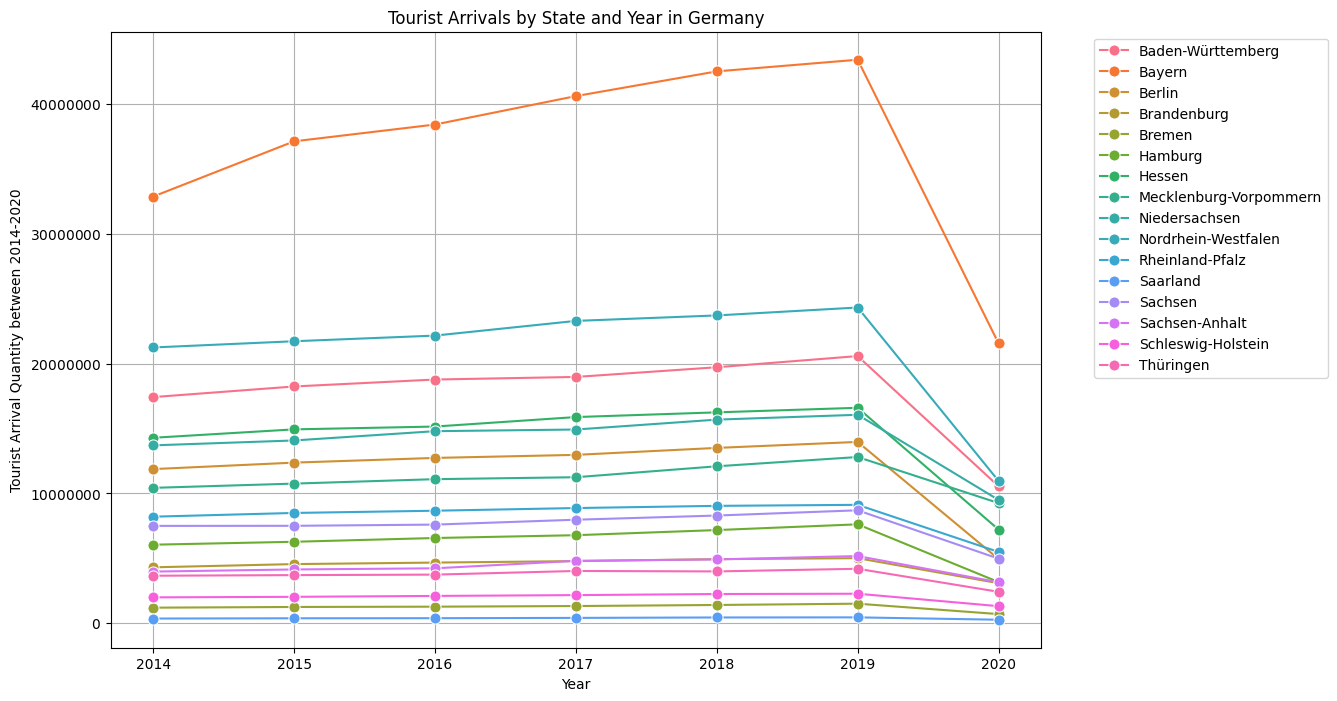

In [5]:
from matplotlib.ticker import ScalarFormatter


tourism_df['total arrival']= pd.to_numeric(tourism_df['total arrival'], errors='coerce').astype('int64')
tourism_by_state_yearly = tourism_df.groupby(['State(s)', 'Year'])['total arrival'].sum().reset_index()

# Plotting the tourist quantity for different states over the years using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=tourism_by_state_yearly, x='Year', y='total arrival', hue='State(s)', marker='o', markersize=8)

plt.xlabel('Year')

plt.ylabel('Tourist Arrival Quantity between 2014-2020')
plt.title('Tourist Arrivals by State and Year in Germany')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend position
plt.grid(True)
# Format y-axis tick labels as integers
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.ticklabel_format(style='plain', axis='y')

plt.show()

As you can see Bayern has the most tourist attraction. And the tourism was increasing every year until the 2020 when the Covid hit the world.

Now let's see how was the transportation performance of different companies in these states...

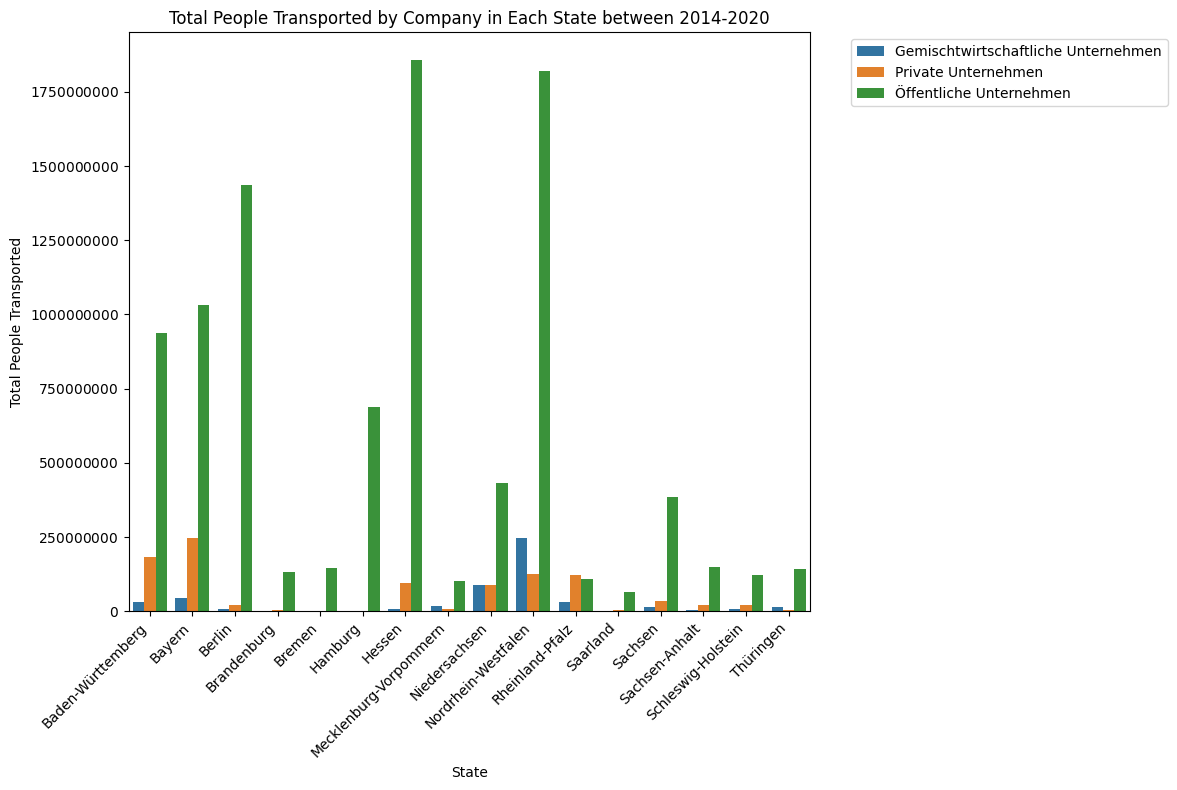

In [6]:
transport_df['Person Transported'] = pd.to_numeric(transport_df['Person Transported'], errors='coerce').astype('int64')
transport_by_state = transport_df.groupby(['Company Type','State(s)', 'Year'])['Person Transported'].sum().reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='State(s)', y='Person Transported', hue='Company Type', data=transport_by_state, errorbar=None)
plt.title('Total People Transported by Company in Each State between 2014-2020')
plt.xlabel('State')
plt.ylabel('Total People Transported')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))

plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

Now it is clear that Öffentliche unternehmen (Public Companies) transported more people in these states as compared to other companies.

One more interesting fact is even though Bavaria has the most number tourists but still it has low transportation as compared to Hessen and Nordrhein-Westfahlen.

Now let's see if there exists a correlation between tourists arrivals and person transported in all transport means...

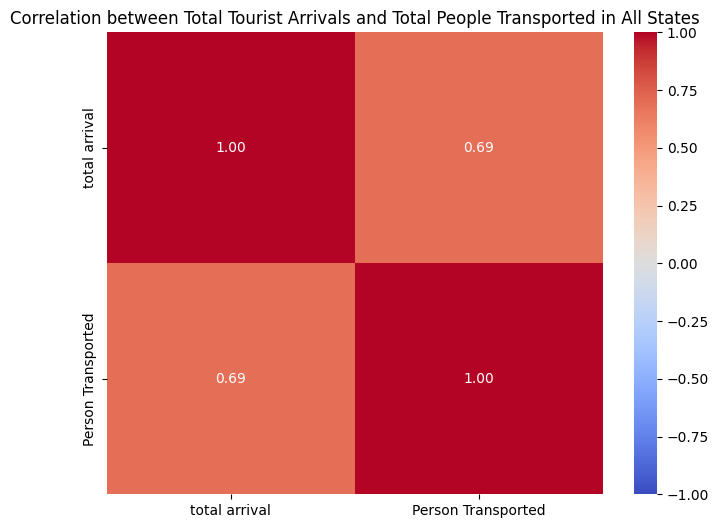

In [7]:
tourism_df['total arrival'] = pd.to_numeric(tourism_df['total arrival'], errors='coerce').astype('int64')

transport_df['Person Transported'] = pd.to_numeric(transport_df['Person Transported'], errors='coerce').astype('int64')

# Group data by 'State(s)' and calculate the sum of 'total arrival' and 'Person Transported'
total_tourist_arrivals = tourism_df.groupby('State(s)')['total arrival'].sum().reset_index()
total_people_transported = transport_df.groupby('State(s)')['Person Transported'].sum().reset_index()


merged_data = pd.merge(total_tourist_arrivals, total_people_transported, on='State(s)', suffixes=('_tourism', '_transport'))

# Calculate Pearson correlation coefficient
correlation_matrix = merged_data[['total arrival', 'Person Transported']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation between Total Tourist Arrivals and Total People Transported in All States')
plt.show()



So there exists a correlation but to get a clear picture of which states have higher or lower correlation will give us a clear picture if the transportation is good there or not. 

Let's find a correlation of each states

In [8]:
tourism_df['total arrival'] = pd.to_numeric(tourism_df['total arrival'], errors='coerce').astype('int64')

transport_df['Person Transported'] = pd.to_numeric(transport_df['Person Transported'], errors='coerce').astype('int64')

# Group data by 'State(s)' and 'Year' and calculate the sum of 'total arrival' and 'Person Transported'
total_tourist_arrivals = tourism_df.groupby(['State(s)', 'Year'])['total arrival'].sum().reset_index()
total_people_transported = transport_df.groupby(['State(s)', 'Year'])['Person Transported'].sum().reset_index()

# Merge dataframes on 'State(s)' and 'Year'
merged_data = pd.merge(total_tourist_arrivals, total_people_transported, on=['State(s)', 'Year'], suffixes=('_tourism', '_transport'))

# Create an empty list to store correlation coefficients and state names
correlation_data = []

# Iterate over unique states
for state in merged_data['State(s)'].unique():
    state_data = merged_data[merged_data['State(s)'] == state]

    if state_data['total arrival'].std() > 0 and state_data['Person Transported'].std() > 0:
        
        correlation_coefficient = state_data['total arrival'].corr(state_data['Person Transported'])

        correlation_data.append({'State(s)': state, 'Correlation Coefficient': correlation_coefficient})


correlation_df = pd.DataFrame(correlation_data)

print(correlation_df)

                  State(s)  Correlation Coefficient
0        Baden-Württemberg                 0.423133
1                   Bayern                 0.901265
2                   Berlin                 0.977321
3              Brandenburg                 0.587964
4                   Bremen                 0.874073
5                  Hamburg                 0.984936
6                   Hessen                 0.981417
7   Mecklenburg-Vorpommern                 0.627689
8            Niedersachsen                 0.928644
9      Nordrhein-Westfalen                 0.982828
10         Rheinland-Pfalz                 0.104442
11                Saarland                -0.085126
12                 Sachsen                 0.953766
13          Sachsen-Anhalt                 0.806877
14      Schleswig-Holstein                 0.863433
15               Thüringen                 0.973954


As we can see all the most visited states have higher correlation coefficient with a good transport performance.

### Conclusion

This analysis shows that the tourism in Germany was increasing from 2014 up until 2020 that saw a major downfall due to Covid. Now tourists mainly rely on public transport to visit tourist places. That is why we find a relationship between both the total tourist and people transported by the public transports. And we noticed a good correlation between the both most of the states concluding that there are good transportation services in major states. But on the other hand states like Saarland and Rheinland-Pflaz have less tourist attraction that's why they have low correlation.

However, it is important to mention here that this correlation doesn't include other factors like exact transport performance in tourist areas instead of whole state which would give a more clear picture of the transport performance.

In future work, a more data needs to be acquired like performance of each mean of transport (trip delays and cancellation).

Nevertheless, this project provides somewhat satisfying info that there are good means of transport in popular tourist attractions.